# Bank Marketing Dataset
## Source:
This dataset is based on the "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). 
## Data Set Information:
This dataset is based on the "Bank Marketing" UCI dataset. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Feature Information:
### Input variables:
* age (numeric)
* job : Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown') #### related with the last contact of the current campaign:
* contact: contact communication type (categorical: 'cellular','telephone')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* duration: last contact duration, in seconds (numeric).
Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 

### Other attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):
*y - has the client subscribed a term deposit? (binary: 'yes','no')



In [1]:
# importing needed libraries and packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
plt.style.use("seaborn")
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Loading and Getting a Glimpse of the Dataset

The dataset provided to us is divided into 2 parts i.e 'test.csv' and 'train.csv'. we have to combine the two datasets provided into a single dataframe before starting the analysis.

In [2]:
# loading dataset
# in this dataset, the data are separated using ';' symbol. Therefore, when reading the CSV, 
# we should instruct the Pandas DataFrame about the separater. This is because the default separater is the ',' 
# and that if we do not specify, the DataFrame will have all the row data into one cell.
test_bank = pd.read_csv('test.csv',sep=';')
train_bank = pd.read_csv('train.csv',sep=';')

bank = pd.concat([test_bank, train_bank])

# getting a glimpse of the data
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.shape
print(f'The dataset has {bank.shape[0]} observations and {bank.shape[1]} variables')

The dataset has 49732 observations and 17 variables


# Basic EDA

Preprocessing data includes handling missing values and outliers, applying feature coding techniques if needed, scale & standardize features.

### Distribution of Y variable

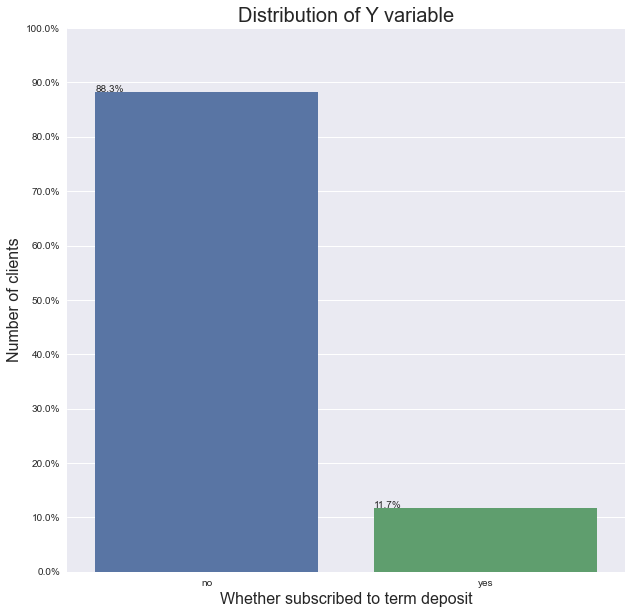

In [4]:
plt.figure(figsize=(10,10))
total=len(bank['y'])
plot=sns.countplot(x=bank['y'],data=bank)
#plot.patches gives x,y coordinate,height width and angle and using this i have converted the labels into the perctage
#to make it interpretable.
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.xlabel('Whether subscribed to term deposit',fontsize=16)
plt.ylabel('Number of clients',fontsize=16)
plt.title('Distribution of Y variable',fontsize=20);
plt.show()

In [5]:
# we use value_counts() to display how many instances are present in the
# categorical feature/class variable
bank['y'].value_counts()


no     43922
yes     5810
Name: y, dtype: int64

By considering the plot and counts of the class variable, we can see that majority of datapoints belong to No class labels with 88.3% and minority of class belongs to 11.7%. we could see that the dataset is an imbalanced dataset, since the number of 'no' are almost 8 times the 'yes' class. 

**Checking for Missing values**

isnull() returns True if the cell contains a missing value and False otherwise.
However, since the dataset is large, it is impractical for us to manually check all True, False values.
Therefore, we will try to get a summary of the missing values in the dataset as follows.




In [6]:
# Finding total standard missing values for each feature using isnull().sum() function
bank.isnull().sum()         

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

As we can that there is no missing values and it was clear from the above code. We dont have to impute missing values here.

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.8+ MB


Frome the above we can see that there are 6 numerical columns ('day' column is considered as numerical, we have to convert it into object) and 11 are categorical dataype including target varaible which is named as y in the dataset.

In [8]:
# Checking number of uniques values in each columns
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### Creating catgorical variables

In [9]:
category=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact','day', 'month', 'poutcome', 'y']
for i in category:
    bank[i]=bank[i].astype('category')

In [10]:
bank.dtypes # Checking data types of each variables

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day          category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [11]:
# Statistical summary for Numerical data
bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,49732.000000,49732,49732,49732,49732,49732.000000,49732,49732,49732,49732.0,49732,49732.000000,49732.000000,49732.000000,49732.000000,49732,49732
unique,NaN,12,3,4,2,NaN,2,2,3,31.0,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,20.0,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,10678,30011,25508,48841,NaN,27689,41797,32181,3009.0,15164,NaN,NaN,NaN,NaN,40664,43922
mean,40.957472,NaN,NaN,NaN,NaN,1367.761562,NaN,NaN,NaN,NaN,NaN,258.690179,2.766549,40.158630,0.576892,NaN,NaN
std,10.615008,NaN,NaN,NaN,NaN,3041.608766,NaN,NaN,NaN,NaN,NaN,257.743149,3.099075,100.127123,2.254838,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,NaN,NaN,320.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [12]:
# Statistical summary for Categorical data
bank.describe(include=['object','category'])

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,31,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown,no
freq,10678,30011,25508,48841,27689,41797,32181,3009,15164,40664,43922


## Univariate Analysis
### 1. Categorical Variables

For Visualizing the distribution of categorical variable, count plot is preffered. A function for ploting count plot using seaborn is defined below. This function takes input as column name and gives corresponding count plot.

In [13]:
def countplot(column):
    plt.figure(figsize=(15,10))
    plot=sns.countplot(x=column,data=bank)
    total=len(bank['y'])
    plt.xlabel(f'{column}',fontsize=16)
    plt.ylabel('Percentage of clients',fontsize=16)
    plt.title('Distribution of {}'.format(column),fontsize=20)
    #plot.patches gives x,y coordinate,height width and angle and using this i have converted the labels into 
    #the percentage to make it interpretable.
    for p in plot.patches:
        
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()), fontsize=12)
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

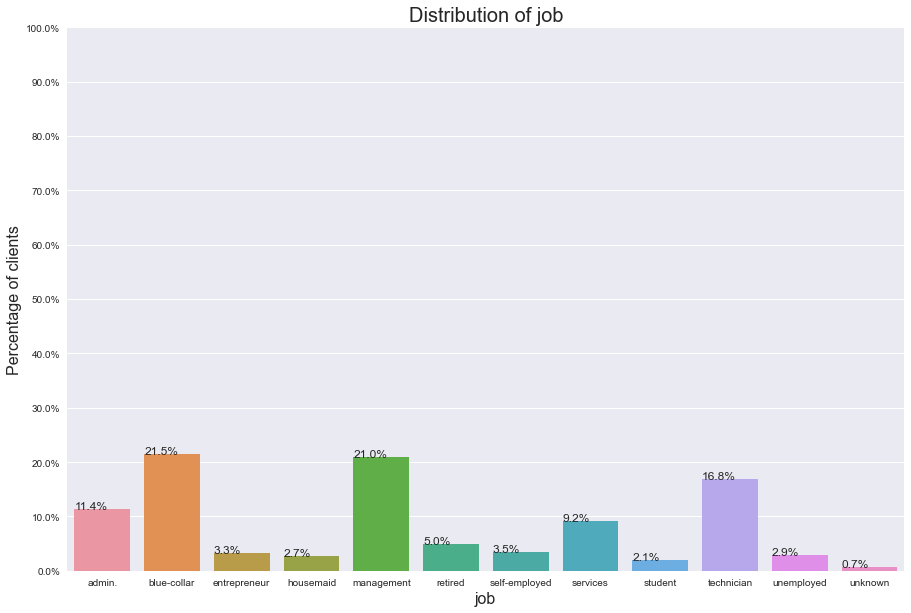

In [14]:
countplot('job')

From the above plot we can see that people with blue-collar job is contacted more by the bank then followed by people with management and Technician job. we can also see there are 0.7% people whose jobs are unknown during contact.

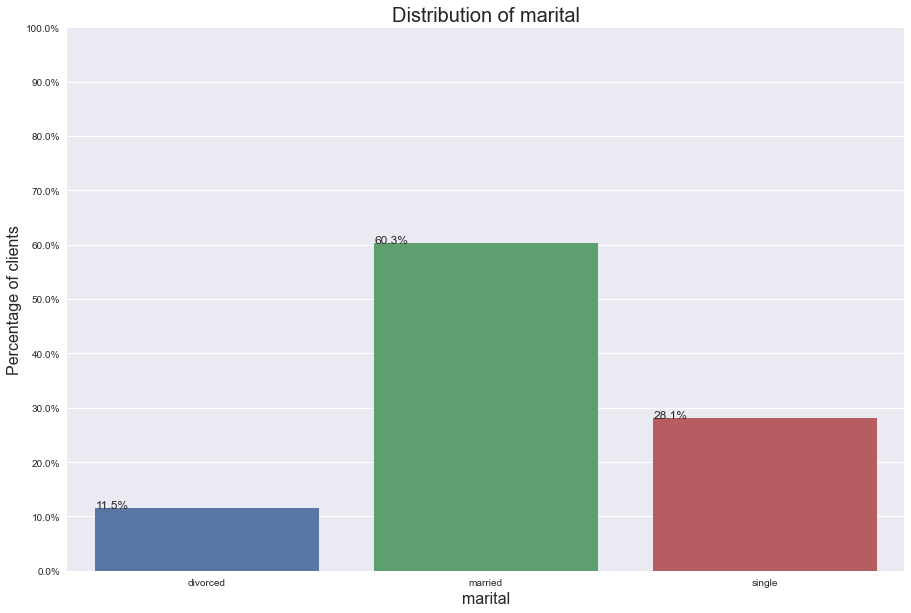

In [15]:
countplot('marital')

from the above plot we can see that out of total(100%) contacts made by the bank, most of the contacts (60.3%) are made to married clients. 

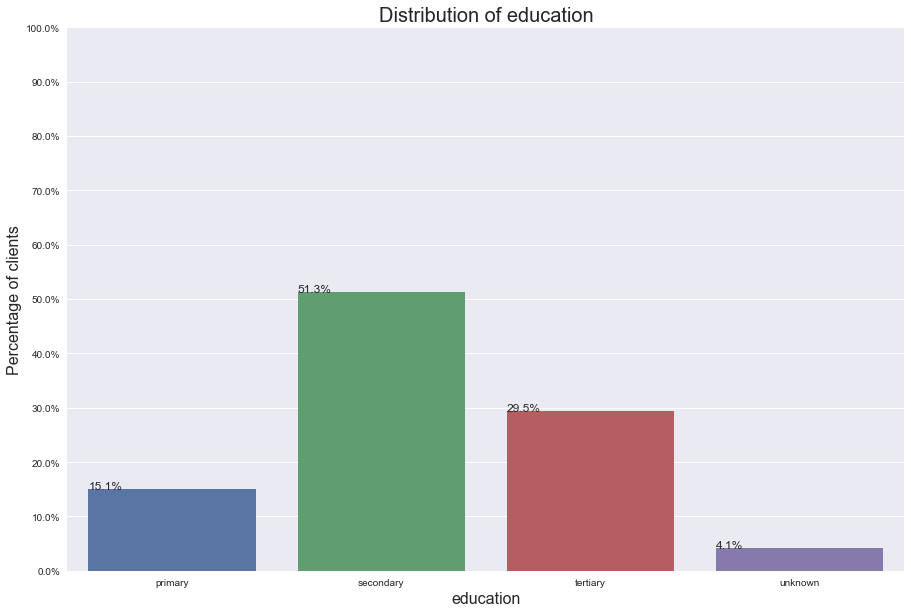

In [16]:
countplot('education')

Customers who has been contacted are mostly (around 50%) completed secondary education then followed by tertiary education. Around 4% of the people contacted have unknown educational qualification.

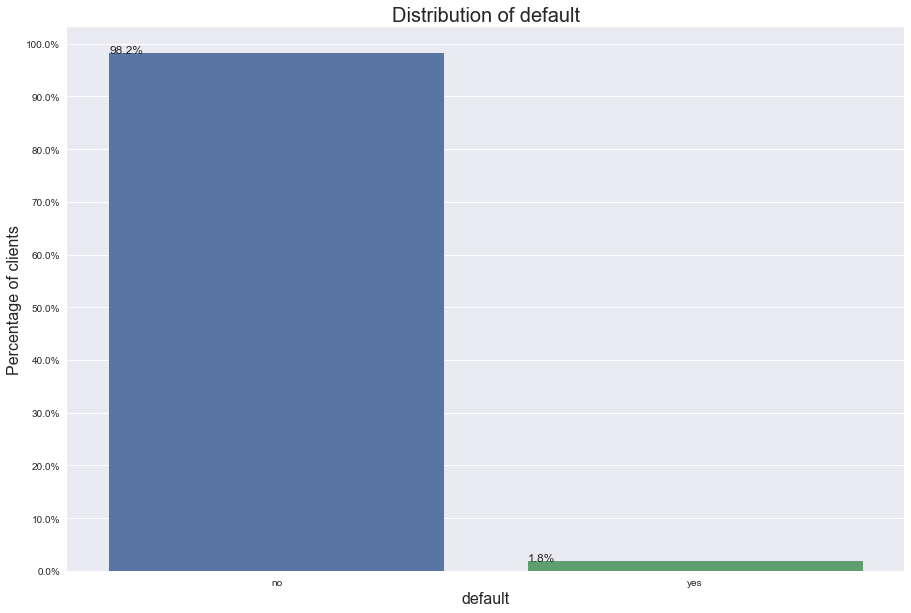

In [17]:
countplot('default')

From the above plot we can clearly see that 98.2% of the clients contacted have 'NO' Default status. Very few of them are there whose default status is 'YES'.

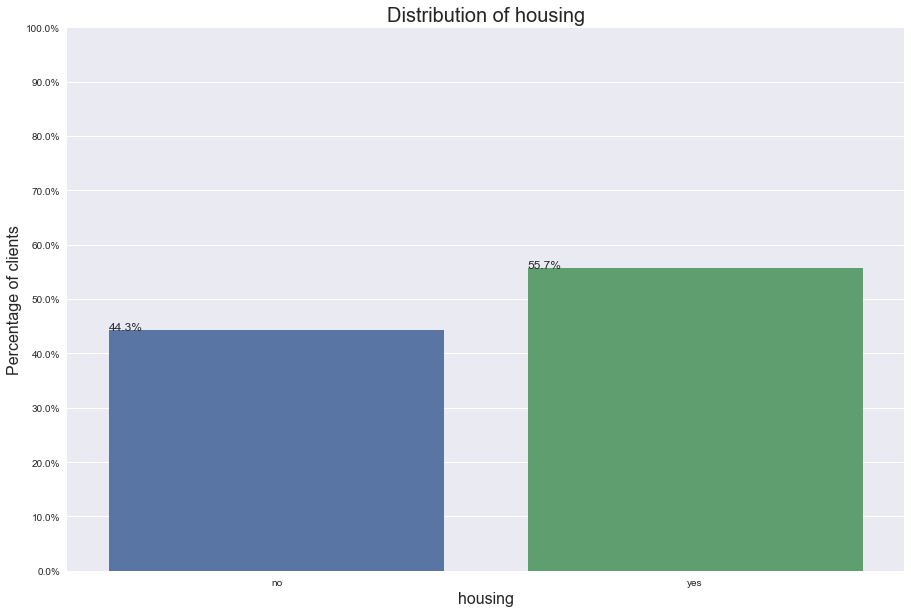

In [18]:
countplot('housing')

From the above plot we can clearly see that 55.7% of the people contacted have taken House Loan in past. while 44.3% have not taken any house loan.

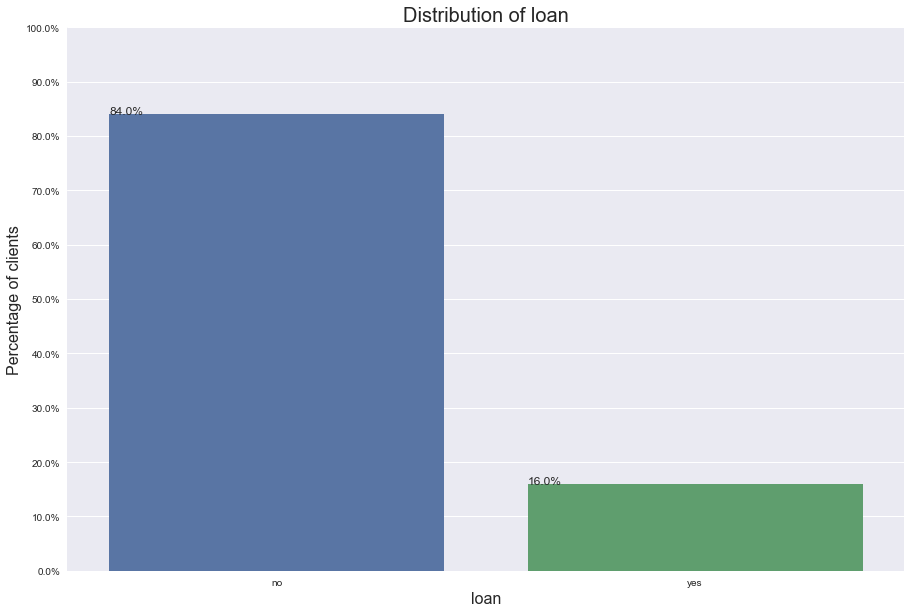

In [19]:
countplot('loan')

People who doesnot have loan has been more contacted for longer term deposits than who does have.

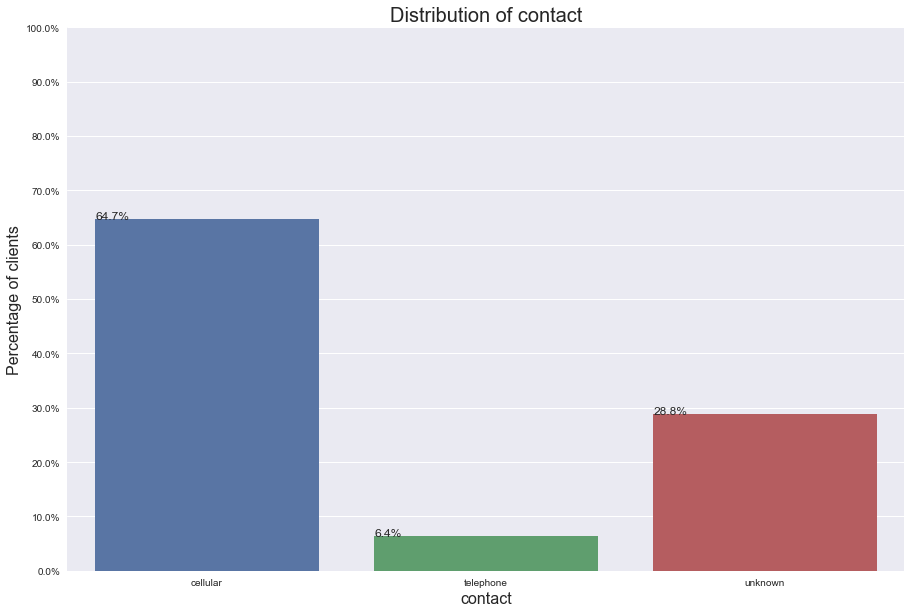

In [20]:
countplot('contact')

People with contact type cellular has been contacted more than with telephone for long term deposits. around 29% people's contact type remains 'unknown'.

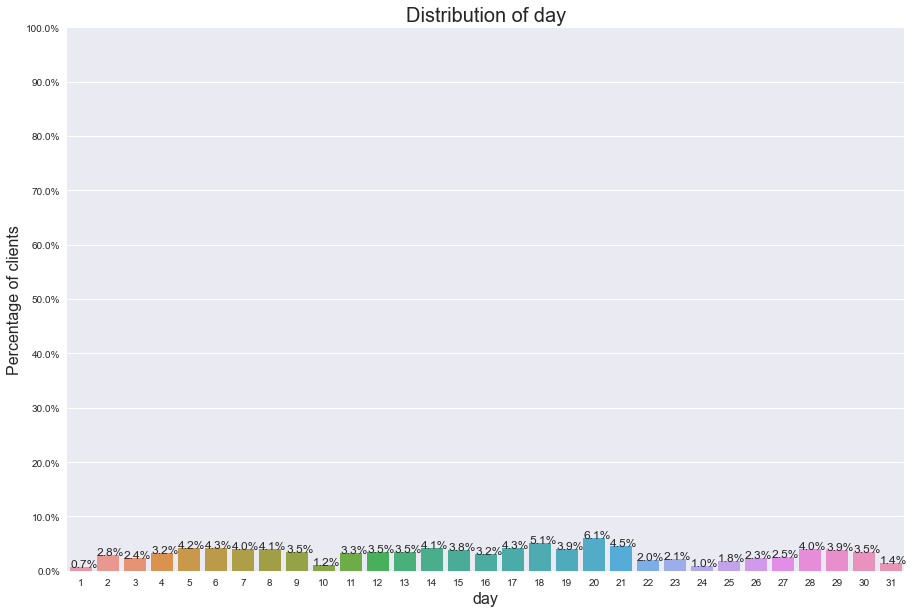

In [21]:
countplot('day')

From the above plot we can see that people are contacted from 1st to 31st of the month. No further weekly inside can be provided as year is not mentioned.

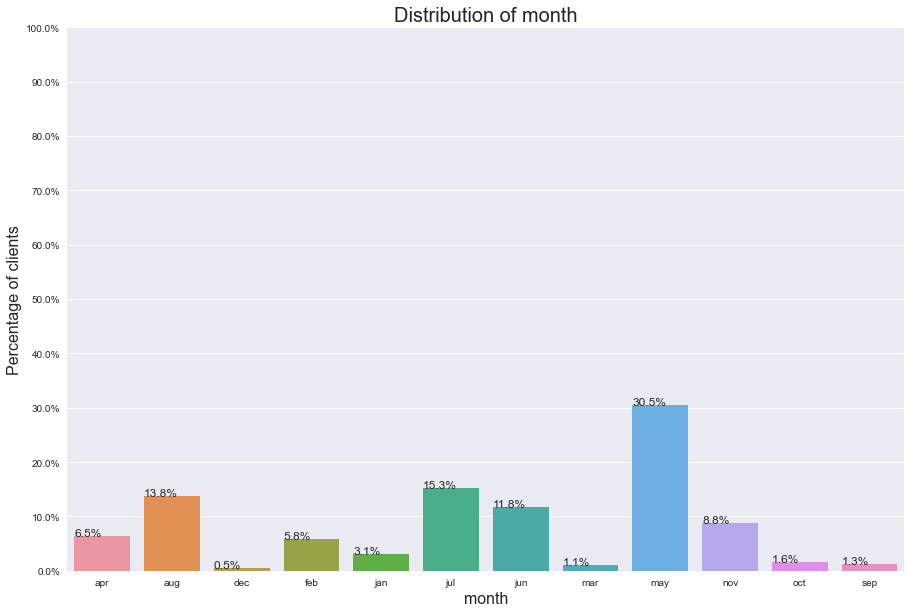

In [22]:
countplot('month')

People are contacted more in the month of May than another months. It is followed by July,August, June.

In [23]:
bank['month'].value_counts()

may    15164
jul     7601
aug     6880
jun     5872
nov     4359
apr     3225
feb     2871
jan     1551
oct      818
sep      631
mar      526
dec      234
Name: month, dtype: int64

It is very interesting from the above code that people are not contacted in the month of January and Februrary.

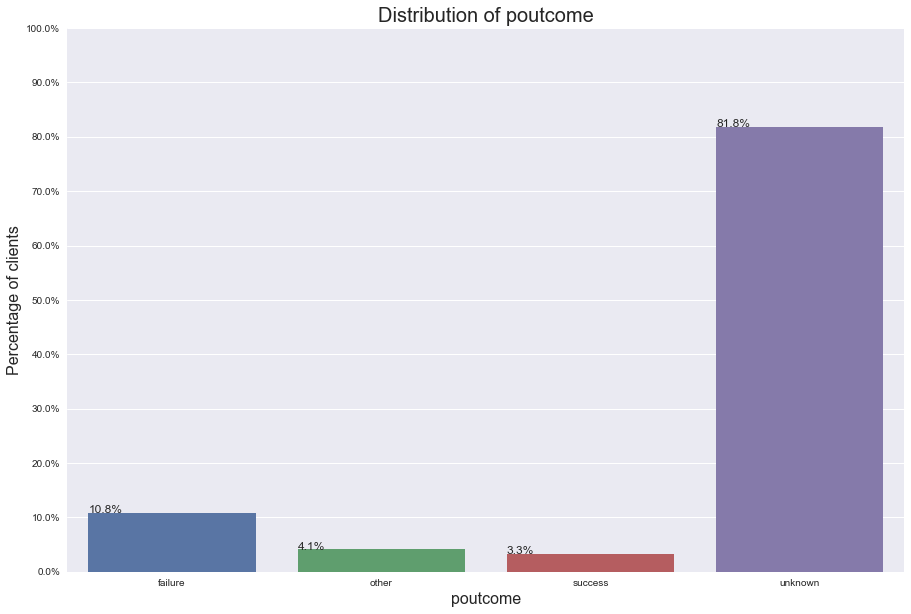

In [24]:
countplot('poutcome')

From this plot it is evident that majority of outcome of previous campaigns are 'Unknown'. Only 3.3% of people from previous marketing campaign has subscribed for long term deposits.

## Bivariate Analysis
Relationship of categorical features with outcome variable (categorical - categorical)

In [25]:
def countplot_with_Y(column, classes):
    plt.figure(figsize=(15,8))
    total=len(bank[classes])
    plot=sns.countplot(x=column,data=bank,hue=classes)
    plt.xlabel(f'{column}',fontsize=16)
    plt.ylabel('Percentage of clients',fontsize=16)
    plt.title('Distribution of {} with target variable(y)'.format(column),fontsize=20)
    plt.legend(fontsize=14);
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

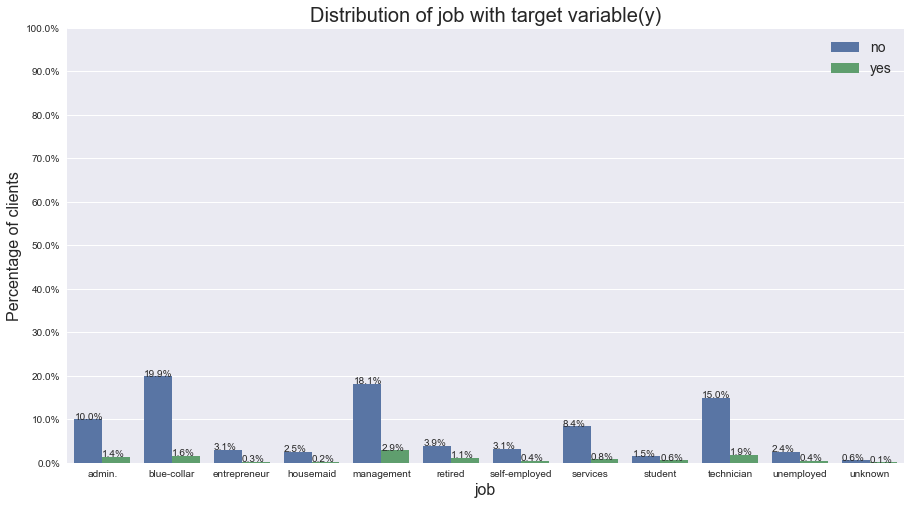

In [26]:
countplot_with_Y('job','y')

This above plot is of job category with target variable, we can observe people with Management jobs have subscribed more (2.9%) for the deposits than people with any other profession.

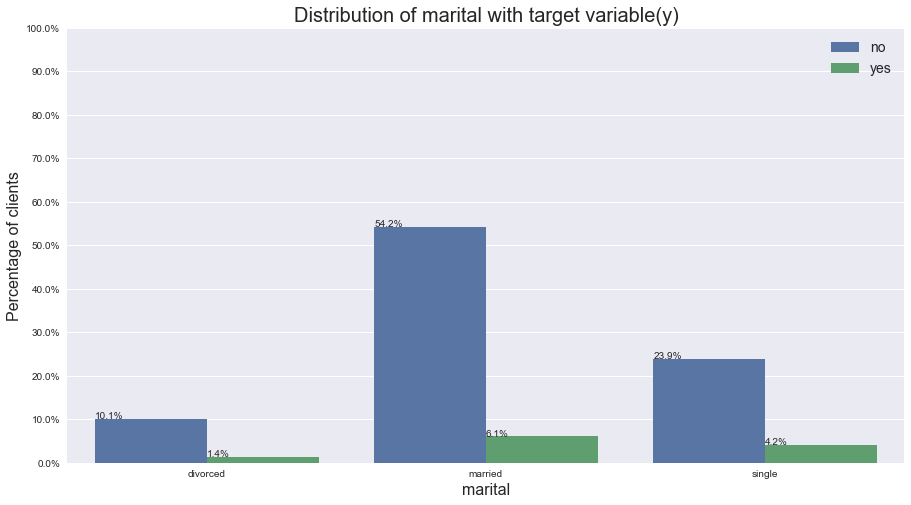

In [27]:
countplot_with_Y('marital','y')

From the above plot we can see that married people has subscribed more (6.1%) to long term deposits than single or divorced people. They are also the most one’s (54%) who have turned down the deposits offered by the bank.

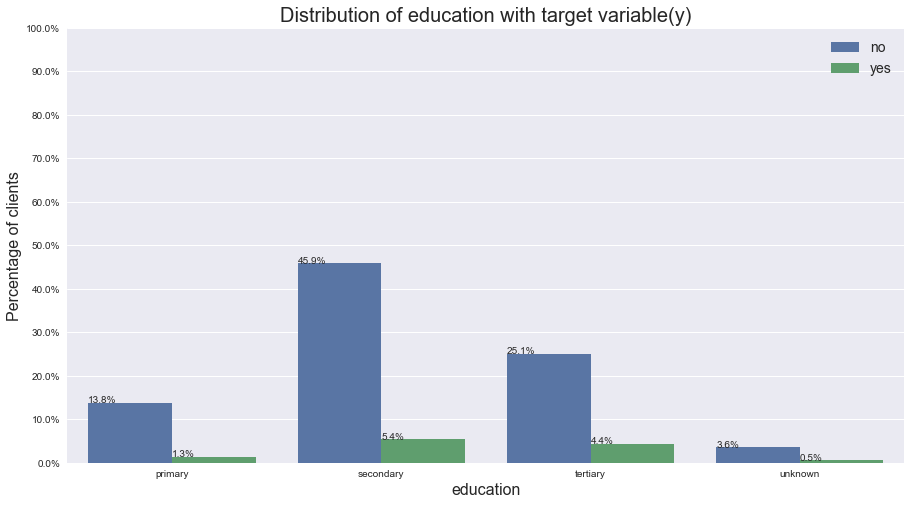

In [28]:
countplot_with_Y('education','y')

People with secondary as education qualification are the most who have subscribed for the deposits followed by tertiary. They are also the most who have not subscribed for deposits follwed by tertiary.

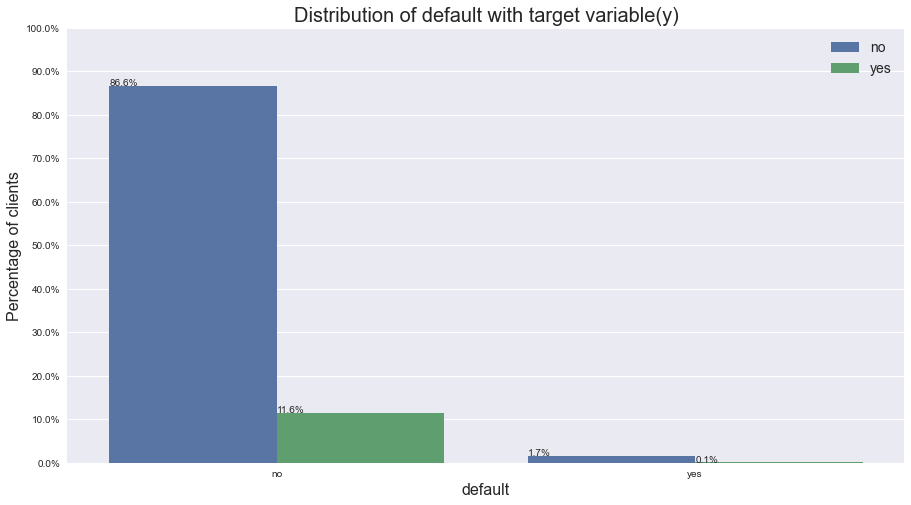

In [29]:
countplot_with_Y('default','y')

From the above plot we can observe that people who has no defult has subscribed to the long term deposits. They are most one's who has not subscribed for the deposits as well.

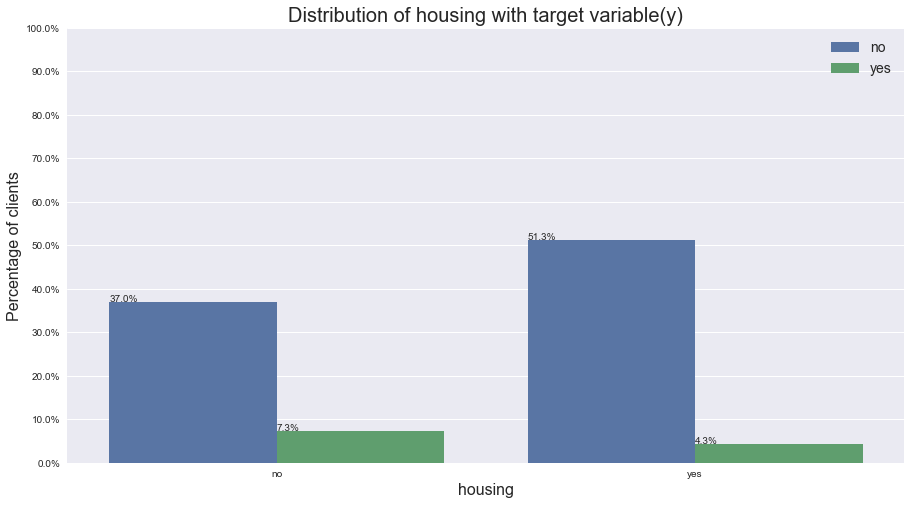

In [30]:
countplot_with_Y('housing','y')

From the above graph we can see that People who does not have housing loan has subscribed more for long term deposits followed by who have loans.

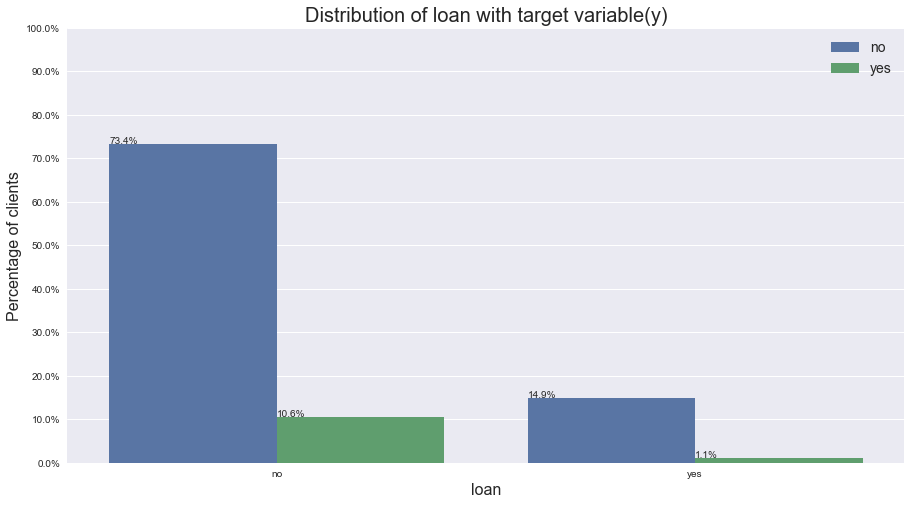

In [31]:
countplot_with_Y('loan','y')

People with no personal loan has subscribed more for long term deposits. They are also the most ones who has not subscribed for long term deposits.

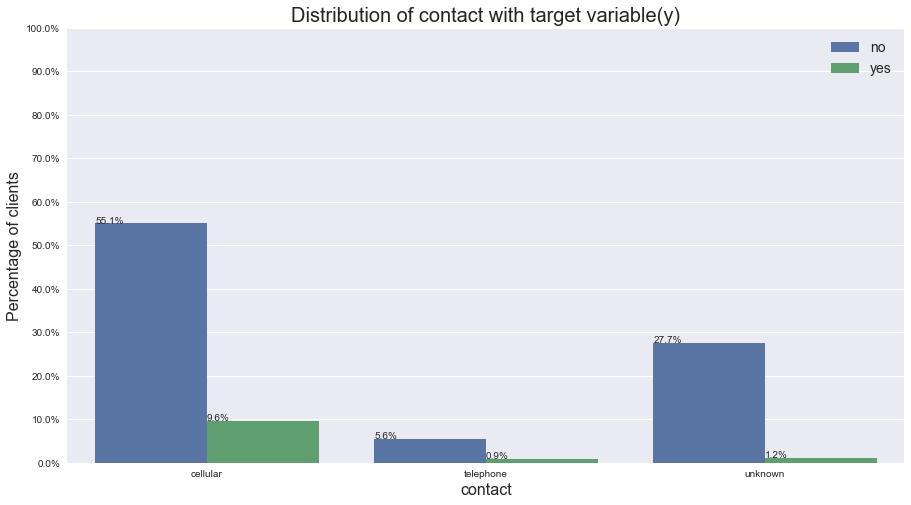

In [32]:
countplot_with_Y('contact','y')

People with contact type cellular has subscribed more for long term deposits than telephone.

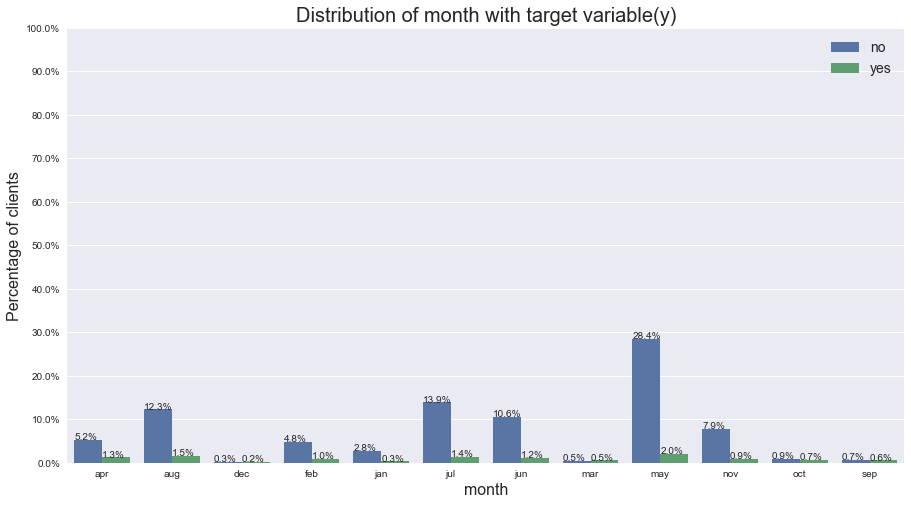

In [33]:
countplot_with_Y('month','y')

From the above graph we can see that People who have contacted in May have higher chances to subscribe for longer term deposits but have also higher chances for not subscribing the long term deposits. Very few people are contacted in the month of December,March,September and October and have almost equal chances for subscribing the deposits or not.

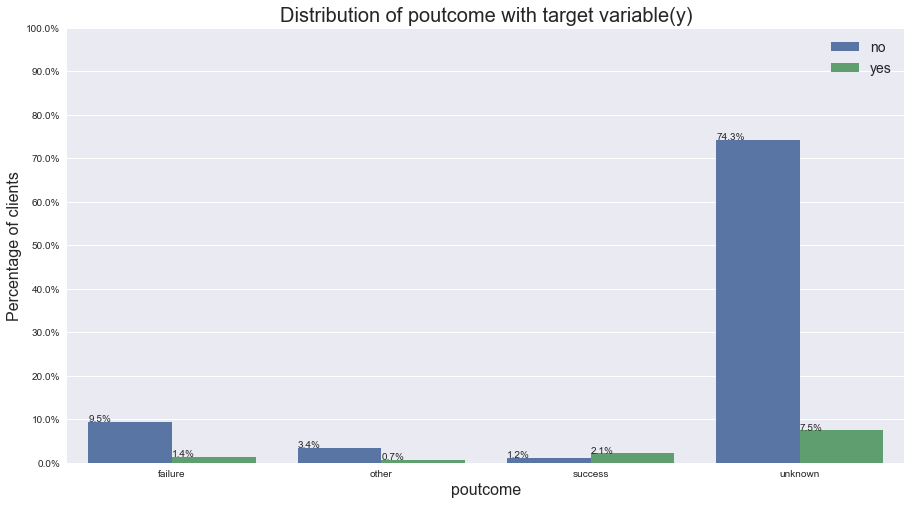

In [34]:
countplot_with_Y('poutcome','y')

# From the above plot, whose previous outcome is unknown has actually subscribed more (7.5%) than any other people belonging to previous outcome. It is also clear that people belonging to success category of previous outcome have also gone for longer deposits (2.1%).

## 2. Numerical Features

In [35]:
def plot_hist(column):
    sns.histplot(bank[column], kde=True);
    sns.set(rc = {'figure.figsize':(15,10)})
    plt.axvline(x=np.mean(bank[column]), c='red', label='mean')
    plt.axvline(x=np.median(bank[column]),c='blue',alpha=0.5,ls='--',label='Median')
    plt.xlabel(f'{column}',fontsize=16)
    plt.ylabel('Number of clients',fontsize=16)
    plt.title('Distribution of {}'.format(column),fontsize=20)
    plt.legend(fontsize=14)

In [36]:
def plot_box(column):
    plt.figure(figsize=(9,6))
    sns.boxplot(bank[column])
    plt.title(column.upper())

### 1. Age

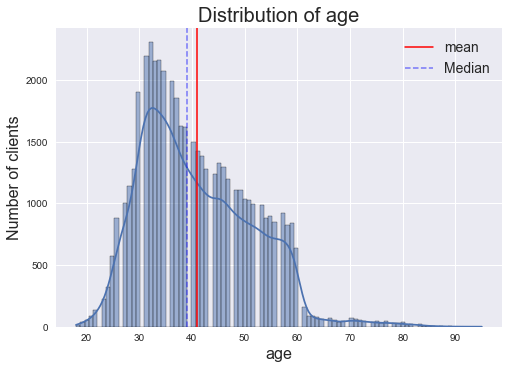

In [37]:
plot_hist('age')

From the above graph we can clearly see that the age data is right skewed. let us also check the value of skewness and box plot for outliers.

In [38]:
print('The skewness value is', bank['age'].skew(), ', Data is moderately skewed')

The skewness value is 0.6860330712686422 , Data is moderately skewed


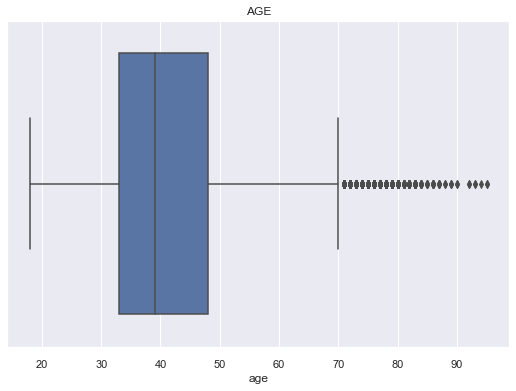

In [39]:
plot_box('age')

From the above box plot it is evident that there are outliers present in the age data. we have to handle outliers so that age data is normally distributed

**Handling Outliers in Age Feature**

we can see that there are no significant outliers, and that there are many datapoints that are outside the boxplot. Therefore removing the datapoints is not a good approach because we will miss important information that are identified here as outliers, since they can carry information in them.

We can replace the extreme ouliers by 2nd percentile and 98th percentile. this will ensure enough variability and information is also not lost.

In [40]:
#Checking 2nd and 98th percentile
bank['age'].quantile(0.02), bank['age'].quantile(0.98) 

(25.0, 63.0)

In [41]:
# replacing age values which are less than 25 by 25 and
# replacing age values which are greater than 63 by 63.
bank['age'] = np.where(bank['age'] <25.0, 25.0,bank['age'])
bank['age'] = np.where(bank['age'] >63.0, 63.0,bank['age'])
print(bank['age'].skew()) #Checking the skewness value again

0.4267895765569408


we can see that from the skewness value our age data is symmetrical now. Let's check the box plot again

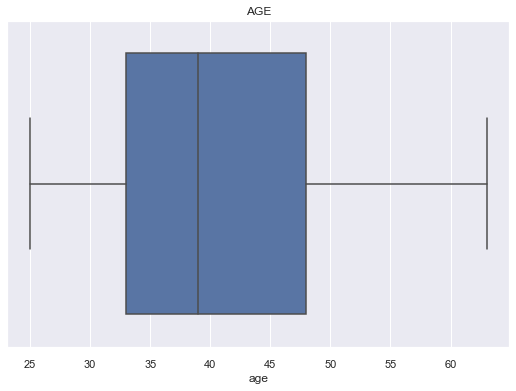

In [42]:
plot_box('age')

No outliers present in age data now

**Outliers from the age data is thus handled successfully**

##  2. balance

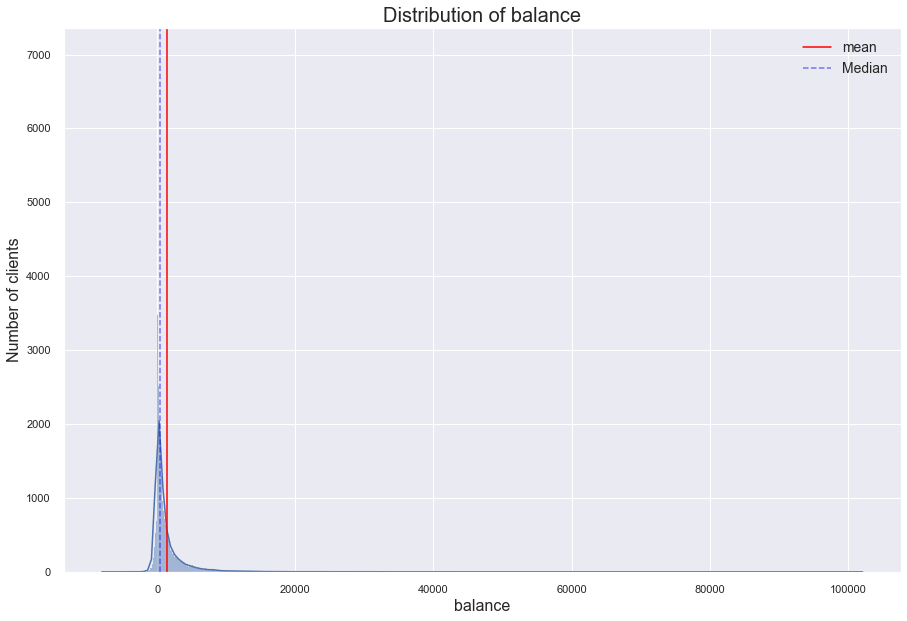

In [43]:
# Creating Histogram for Balance Feature
plot_hist('balance')

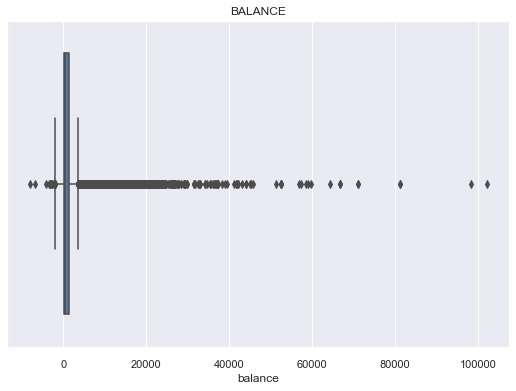

In [44]:
# Creating box plot for Balance Feature
plot_box('balance')

When checking the above visualized histogram and boxplot for the balance feature, we can see that eventhough there are many data points outside the boxplot as in the age boxplot, we can point out a range where the datapoints start to spread wider.

We have to perform some transformation to handle the ouliers and try to make Normal distribution.

As we have so many negative and zero values in the balance feature. log transformation and boxcox is not suitable.

**I will be applying exponential transformation on Balance feature for better results than square-root transform**

In [45]:
# Checking the skewness value
bank['balance'].skew()

8.20442868002862

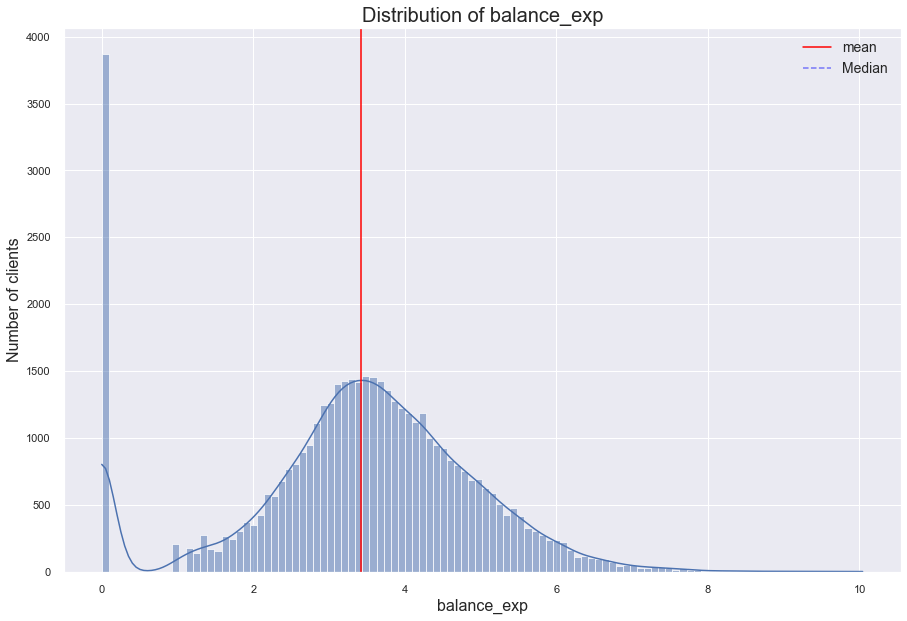

In [46]:
# Applying exponential transformation on balance feature
# creating new transformed feature 'balance_exp'
bank['balance_exp'] = bank['balance']**(1/5)
plot_hist('balance_exp')

### From the above curve we can see our most of the data is transformed to give normal distribution. As there are zero values for balance is present in the feature, we might need to remove these values for future modelling purposes.

In [47]:
# Checking the skewness value again for transformed data
bank['balance_exp'].skew()

-0.4498501929036316

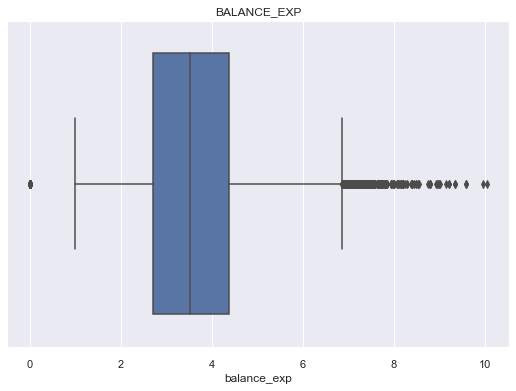

In [48]:
plot_box('balance_exp')

<AxesSubplot:xlabel='y', ylabel='balance_exp'>

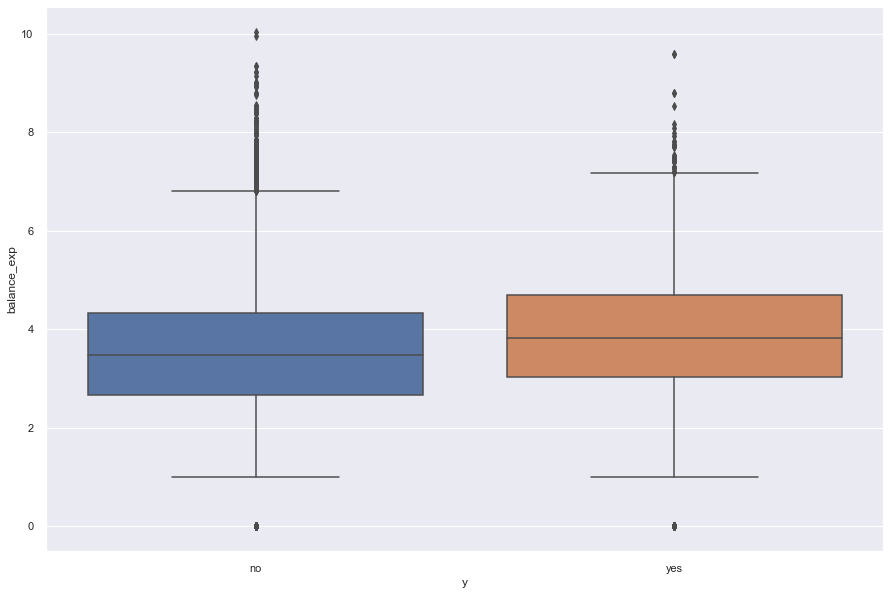

In [49]:
sns.boxplot(data=bank,x='y',y='balance_exp')

## 3. duration

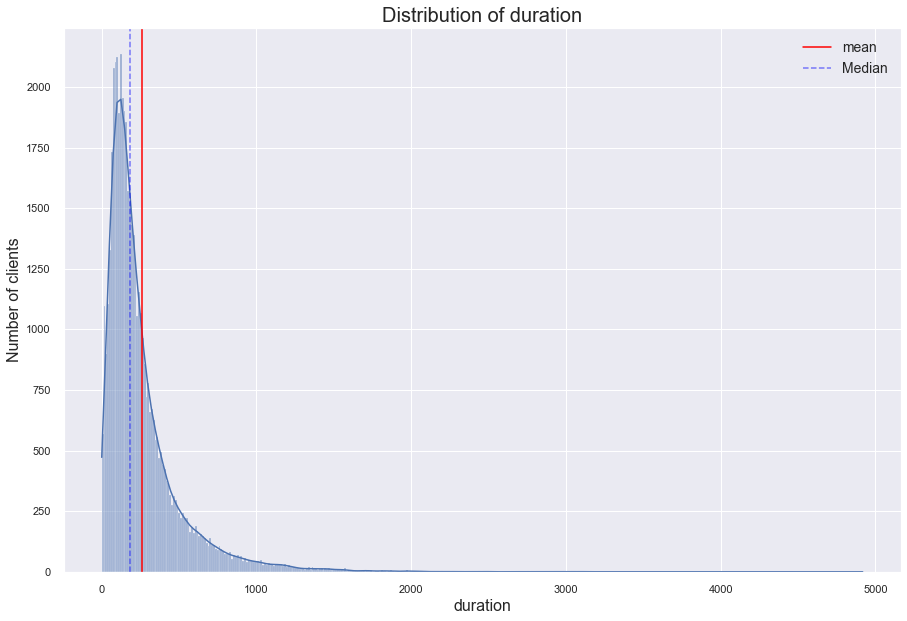

In [50]:
plot_hist('duration')

From the above graph, Distribution of duration feature is right skewed.

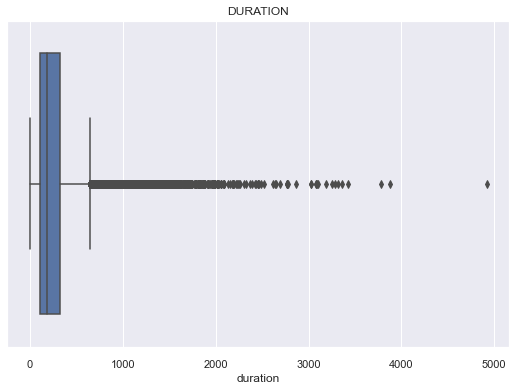

In [51]:
plot_box('duration')

When checking the above visualized histogram and boxplot for the duration feature, we can see that data is haveing outliers.

We have to perform some transformation to handle the ouliers and try to make Normal distribution.

**I will be applying exponential transformation on duration feature for better results than square-root transform**

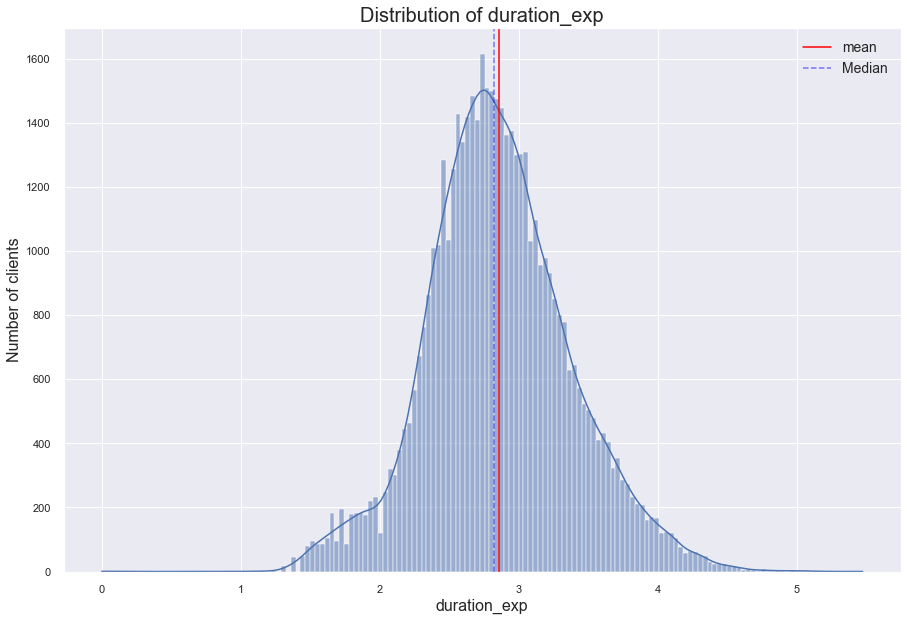

In [52]:
# Applying exponential transformation on duration feature
# creating new transformed feature 'duration_exp'
bank['duration_exp'] = bank['duration']**(1/5)
plot_hist('duration_exp')

In [53]:
bank['duration_exp'].skew()

0.1976259849233628

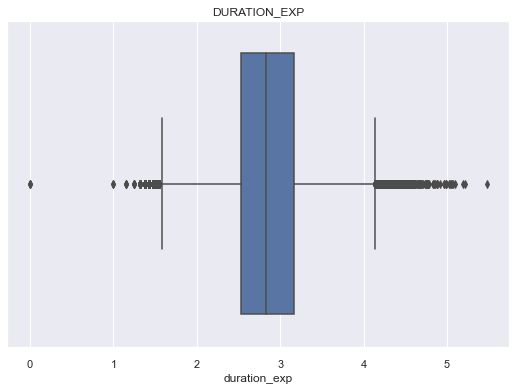

In [54]:
plot_box('duration_exp')

### From the above histogram and boxplots for transformed duaration feature, we can see that the data is transformed to give normal distribution. and skewness value is very low i.e. 0.19

## 4. Campaign (Numerical)

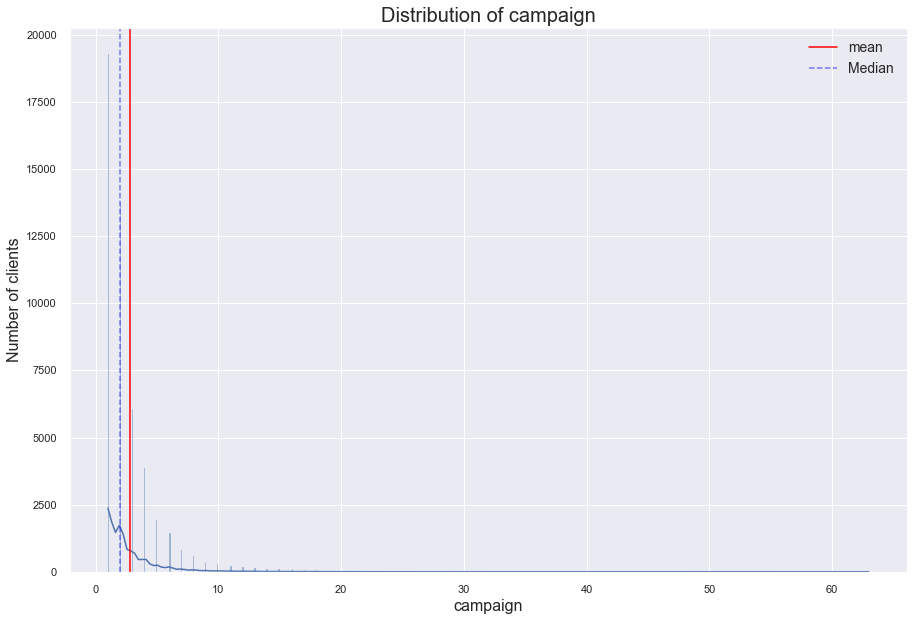

In [55]:
plot_hist('campaign')

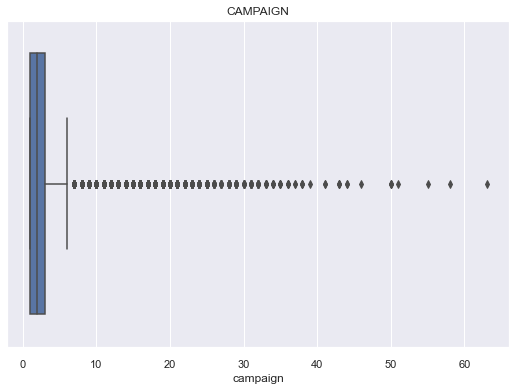

In [56]:
plot_box('campaign')

**Removing Outliers**

When checking the boxplot visualization, we can see that a break has occured in the datapoints outside the boxplot aroung the campaign count 40. Therefore, i will be clearing the datapoints that has campaign contact count more than 40.

After Campaign Shape: (49717, 19)


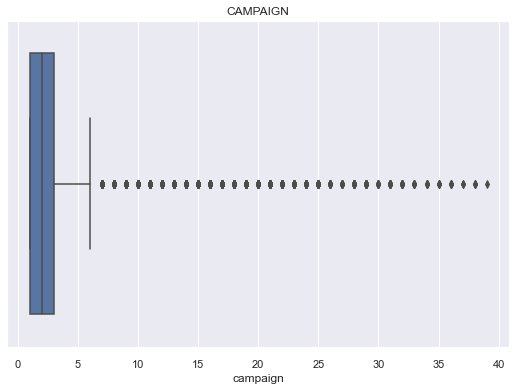

In [57]:
# removing datapoints that have campaign values greater than 40
bank = bank[(bank['campaign']<40)]

print("After Campaign Shape:",bank.shape)

plot_box('campaign')

In [58]:
bank['campaign'].skew()

4.311246879979855

In [59]:
bank['previous'].skew()

40.778479279132725

In [60]:
bank = bank[(bank['previous']<50)]

In [61]:
bank['previous'].skew()

6.789227197743681

## 5. Pdays

### pdays: number of days that passed by after the client was last contacted from a previous campaign. pdays = -1 means client was not previously contacted. we can convert pdays into categorical feature dividing it into 2 parts wheather the client was previously contacted or not.
Pdays = -1 means client is not previously contacted.
pdays = 1 means client was contacted previously.

In [62]:
bank[bank['pdays']== -1]['pdays'].value_counts()

-1    40644
Name: pdays, dtype: int64

In [63]:
bank['pdays_cat'] = np.where(bank['pdays'] >=0, 1,bank['pdays'])

In [64]:
bank['pdays_cat'].value_counts()

-1    40644
 1     9069
Name: pdays_cat, dtype: int64

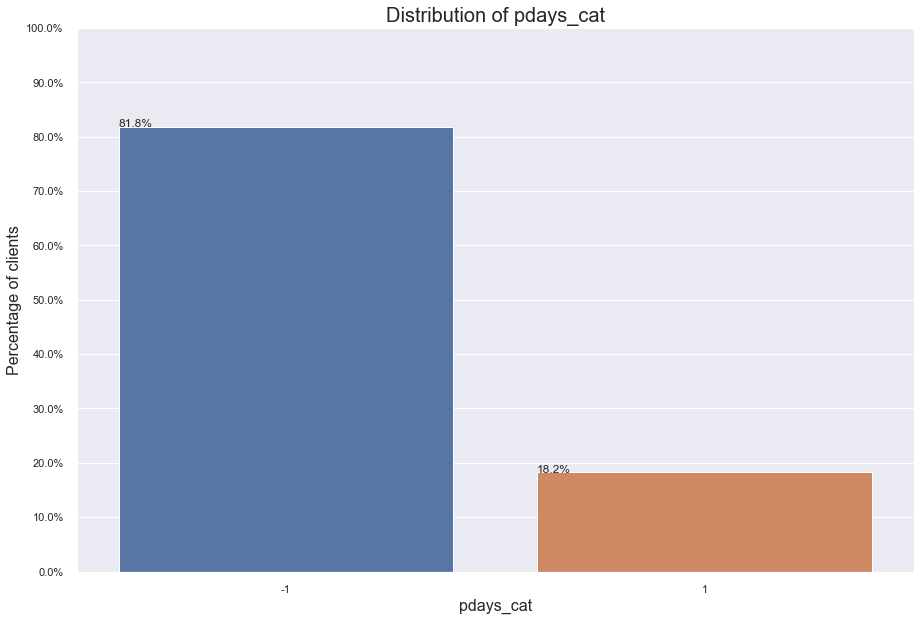

In [65]:
countplot('pdays_cat')

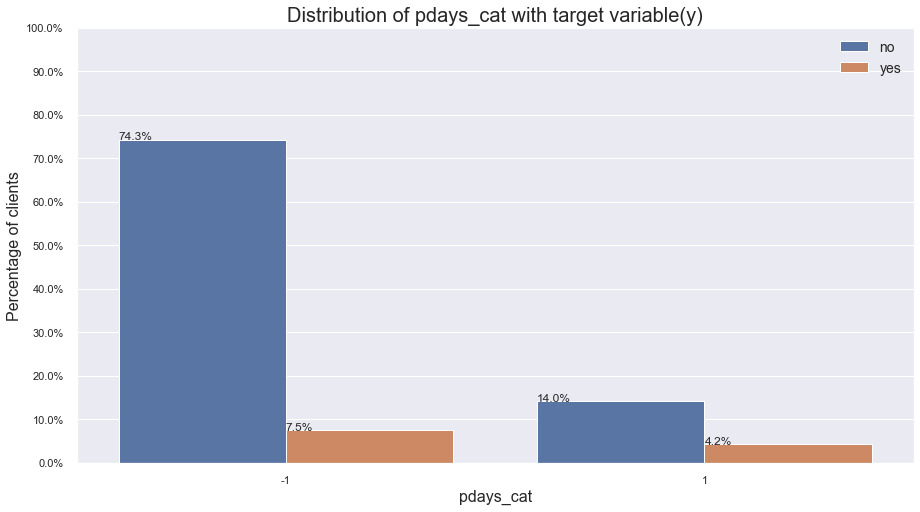

In [66]:
countplot_with_Y('pdays_cat','y')

### From the above plot we can see that 81.8% of the total clients were not contacted previously while 18.2% clients were contacted previously.

## Finding relationship between features.

In [67]:
def plotting_violinplot(column1,column2):
    plt.figure(figsize=(15,10))
    sns.violinplot(x=bank[column1],y=bank[column2],hue=bank['y'],showfliers=False)
    plt.show()

In [68]:
def plotting_catplot(column1,column2,height=10):
    sns.catplot(x=column1, col=column2,hue='y',col_wrap=2,data=bank,kind="count", height=height, aspect=.8)
    plt.xlabel(f'{column1}',fontsize=16)
    plt.ylabel(f'{column2}',fontsize=16)
    plt.legend(fontsize=14);

## Converting Age into categorical data

In [69]:
def age_to_categorical(data1,age):
    age_group=pd.cut(age,bins=[10,20,30,40,50,60,70,80,90,100],labels=['10-19','20-29','30-39','40-49','50-59','60+','70-79','80-89','90-100'])
    #inserting the age group after age and deleting it
    data1.insert(1,'age_group',age_group)
    #dropping age column
    #data1.drop('age',axis=1,inplace=True)
    
    return data1
bank=age_to_categorical(bank,bank.age)    

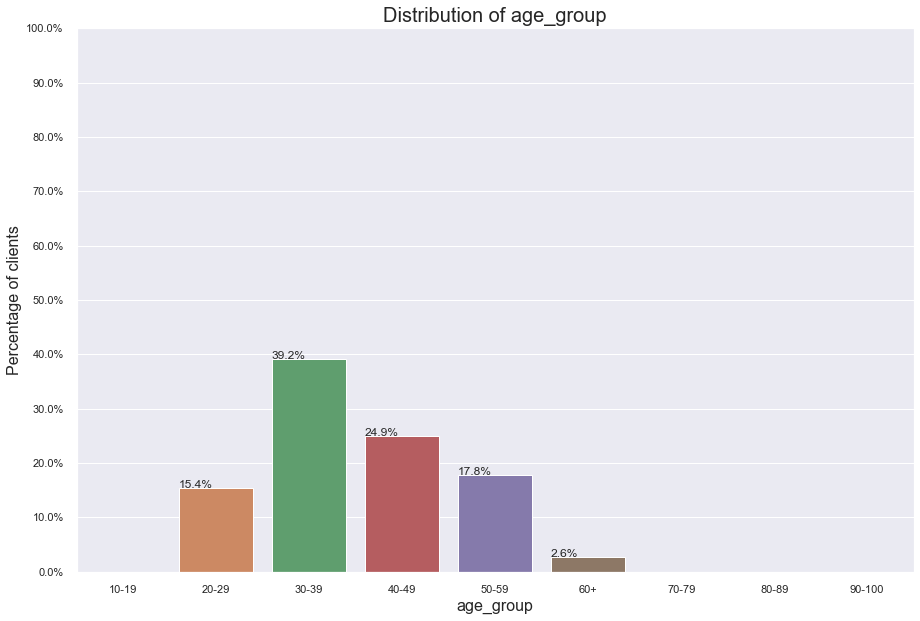

In [70]:
countplot('age_group')

Bank has contacted to the most between the age group of 30-39 followed by 40-49

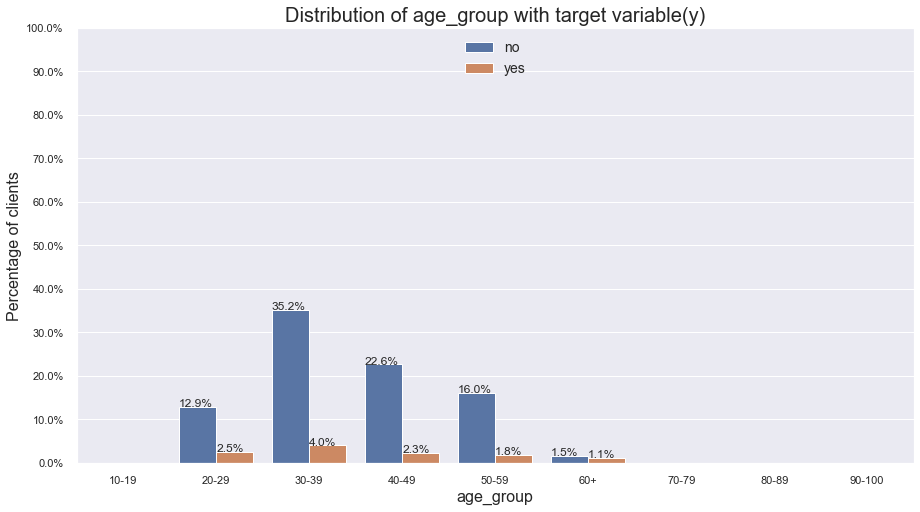

In [71]:
countplot_with_Y('age_group','y')

Age group of 30-39 are the most people who have not subscribed for the deposits. They are also the most who has subscribed for the deposits.

### Age Group and Job

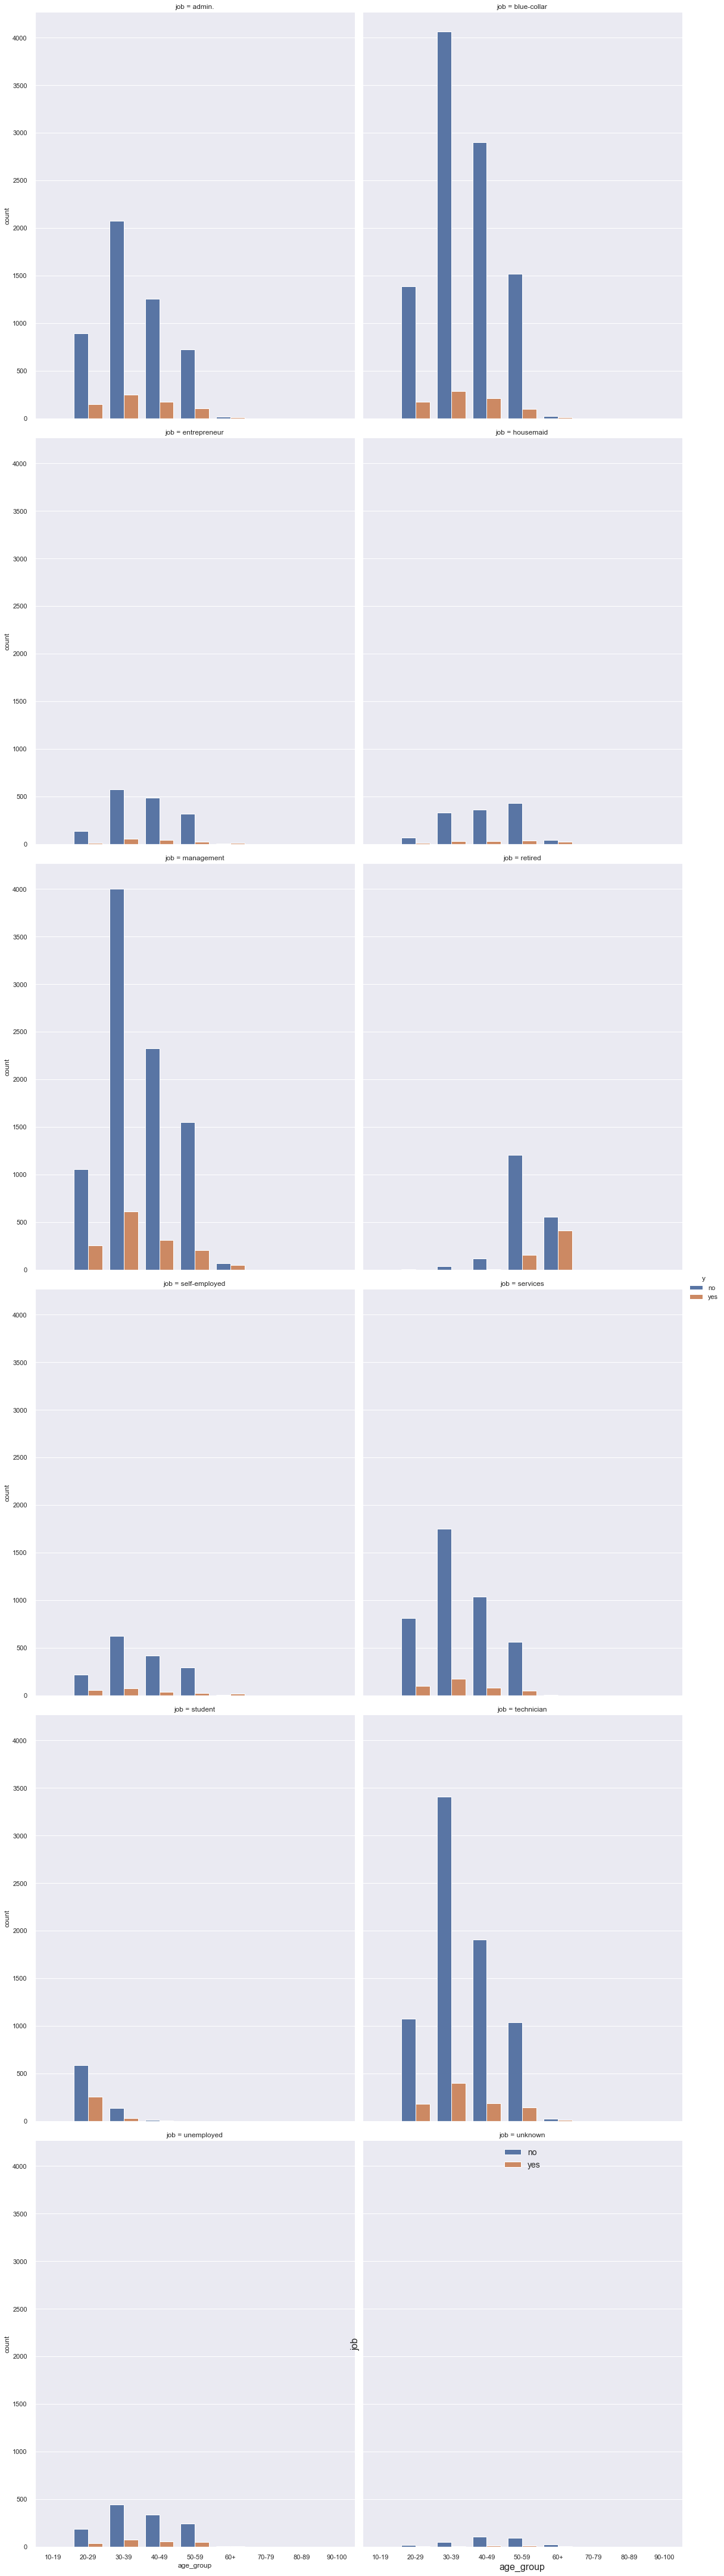

In [72]:
plotting_catplot('age_group','job')

People whose profession is management and age group between 30-39 has the highest number for subscribing for deposits. Followed by the age group 20-29 and 40-49 in the same profession.

### Age Group and Education

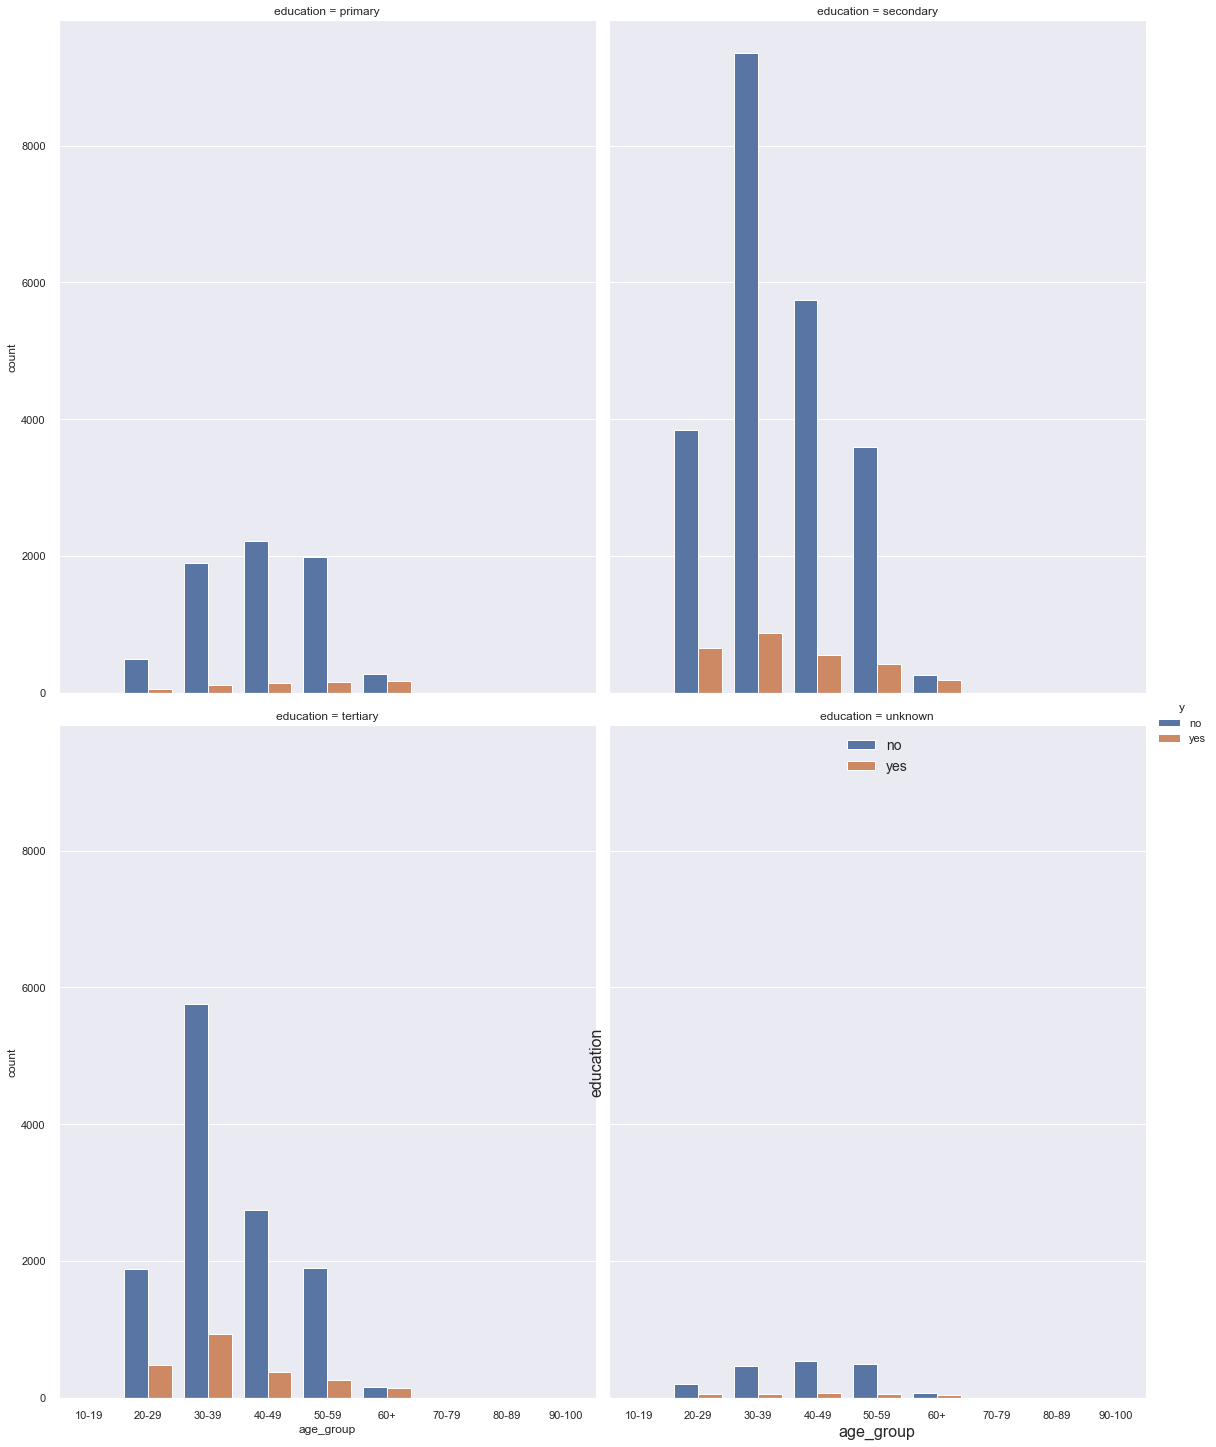

In [73]:
plotting_catplot('age_group','education')

People who are in age group of 30-39 and have completed secondary education are the most ones who have and have not subscribed for deposits.

## Summary:

* People who are in management job has been more contacted for the deposits by the bank.
* People who are married has been contacted more for the deposits by the bank.
* People have been contacted more on the cellular than the telephone.
* People has been conatcted more in the month of May than any other month. They have not been contacted in January and Februray at all.
* People with no default status has been contacted more by the bank.
* People who has housing loan has been contacted more by the bank
* People with no personal loan has been contacted more by the bank.
* People who are in tertiary education has been contacted more by the bank.
* Age,Duration,Campaign have outliers and are rightly skewed.
* Pdays have more than 70% of data imputed so it is better to convert it into categorical column.
* Converted the age into age_group with 9 group from 10-100.